In [8]:
from arctic import CHUNK_STORE, Arctic

a = Arctic('localhost')
a.initialize_library('etf_quotes', lib_type=CHUNK_STORE)
lib = a['etf_quotes']
lib

Library created, but couldn't enable sharding: no such command: 'enablesharding', full error: {'ok': 0.0, 'errmsg': "no such command: 'enablesharding'", 'code': 59, 'codeName': 'CommandNotFound'}. This is OK if you're not 'admin'


    <ArcticLibrary at 0x26cd5d42988, arctic.etf_quotes>
        <Arctic at 0x26cd5d428c8, connected to MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, maxpoolsize=4, sockettimeoutms=600000, connecttimeoutms=2000, serverselectiontimeoutms=30000)>

In [40]:
#df = lib.read('164808.SZ')
#chunk_range=pd.date_range('2012-01-01','2020-01-01')
df = lib.read('160105.SZ',columns=['close','factor'])
#print(lib.get_info('513290.SH'))
df

,close,factor
date,,
2004-12-20,0.980000,1.000
2004-12-21,0.976000,1.000
2004-12-22,0.978000,1.000
2004-12-23,0.972000,1.000
2004-12-24,0.974000,1.000
...,...,...
2022-10-10,6.405570,6.219
2022-10-11,6.486417,6.219
2022-10-12,6.654330,6.219


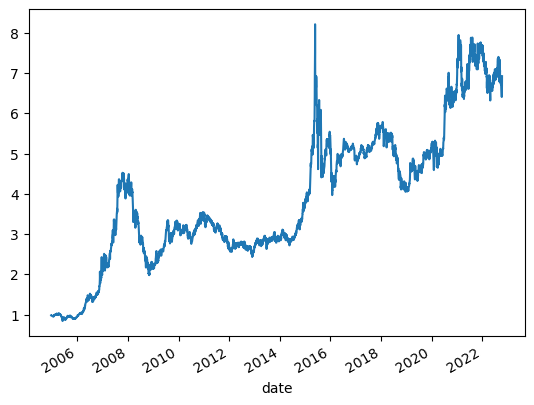

In [41]:
df['close'].plot()

In [128]:
a.initialize_library('stock_daily', lib_type=CHUNK_STORE)
lib_stock = a['stock_daily']
lib_stock.list_symbols()

Library created, but couldn't enable sharding: no such command: 'enablesharding'. This is OK if you're not 'admin'


['600185.SH', '600301.SH']

In [187]:
symbol = '600185.SH'
#lib_stock.delete(symbol)
import pandas as pd
from arctic.date import DateRange
df = lib_stock.read(symbol,DateRange('2015-12-27', '2016-02-28'),columns=['close'])
lib_stock.get_info(symbol)
df

,close
date,
2015-12-28,21.07
2015-12-29,21.34
2015-12-30,21.57
2015-12-31,21.24
2016-01-04,19.12
2016-01-05,18.84
2016-01-06,19.23
2016-01-07,17.31
2016-01-08,17.33


In [178]:
list(lib_stock.get_chunk_ranges('600185.SH'))

[(b'2002-02-06 00:00:00', b'2002-02-06 23:59:59.999000'),
 (b'2002-02-07 00:00:00', b'2002-02-07 23:59:59.999000'),
 (b'2002-02-08 00:00:00', b'2002-02-08 23:59:59.999000'),
 (b'2002-02-25 00:00:00', b'2002-02-25 23:59:59.999000'),
 (b'2002-02-26 00:00:00', b'2002-02-26 23:59:59.999000'),
 (b'2002-02-27 00:00:00', b'2002-02-27 23:59:59.999000'),
 (b'2002-02-28 00:00:00', b'2002-02-28 23:59:59.999000'),
 (b'2002-03-01 00:00:00', b'2002-03-01 23:59:59.999000'),
 (b'2002-03-04 00:00:00', b'2002-03-04 23:59:59.999000'),
 (b'2002-03-05 00:00:00', b'2002-03-05 23:59:59.999000'),
 (b'2002-03-06 00:00:00', b'2002-03-06 23:59:59.999000'),
 (b'2002-03-07 00:00:00', b'2002-03-07 23:59:59.999000'),
 (b'2002-03-08 00:00:00', b'2002-03-08 23:59:59.999000'),
 (b'2002-03-11 00:00:00', b'2002-03-11 23:59:59.999000'),
 (b'2002-03-12 00:00:00', b'2002-03-12 23:59:59.999000'),
 (b'2002-03-13 00:00:00', b'2002-03-13 23:59:59.999000'),
 (b'2002-03-14 00:00:00', b'2002-03-14 23:59:59.999000'),
 (b'2002-03-15

<AxesSubplot:xlabel='date'>

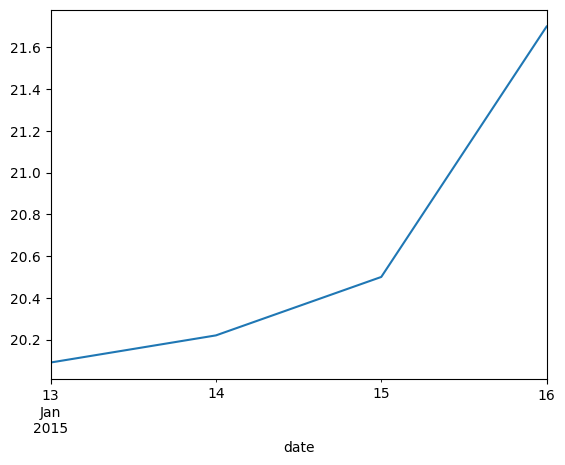

In [101]:
import matplotlib.pyplot as plt
df['close'].plot()


In [66]:
lib_chg.read('129031.SZ')

,chg_price
date,
2011-07-19,8.09
2012-07-17,8.05
2012-08-01,5.47


In [47]:
df = DataFrame(data={'data': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'open': [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9],
                         'close': [1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 9.0],
                         'prev_close': [.1, .2, .3, .4, .5, .6, .7, .8, .8],
                         'volume': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
                         },
                   index=MultiIndex.from_tuples([(dt(2016, 1, 1), 1),
                                                 (dt(2016, 1, 2), 1),
                                                 (dt(2016, 1, 3), 1),
                                                 (dt(2016, 2, 1), 1),
                                                 (dt(2016, 2, 2), 1),
                                                 (dt(2016, 2, 3), 1),
                                                 (dt(2016, 3, 1), 1),
                                                 (dt(2016, 3, 2), 1),
                                                 (dt(2016, 3, 3), 1)],
                                                names=['date', 'id'])
                   )
df

,,data,open,close,prev_close,volume
date,id,,,,,
2016-01-01,1,1,1.1,1.2,0.1,1000
2016-01-02,1,2,2.2,2.3,0.2,2000
2016-01-03,1,3,3.3,3.4,0.3,3000
2016-02-01,1,4,4.4,4.5,0.4,4000
2016-02-02,1,5,5.5,5.6,0.5,5000
2016-02-03,1,6,6.6,6.7,0.6,6000
2016-03-01,1,7,7.7,7.8,0.7,7000
2016-03-02,1,8,8.8,8.9,0.8,8000
2016-03-03,1,9,9.9,9.0,0.8,9000


In [54]:
import pandas as pd
lib.write('column_test', df, chunk_size='D')
df = lib.read('column_test', chunk_range=pd.date_range('2016-01-01', '2016-01-02'),columns=['prev_close', 'volume'])
df

,,prev_close,volume
date,id,,
2016-01-01,1,0.1,1000
2016-01-02,1,0.2,2000


In [80]:
df = DataFrame(data={'data': [100, 200, 300],'data2':['appl', 'bbc', 'OKOK']},
               index=MultiIndex.from_tuples([(dt(2016, 1, 1), 1),
                                                (dt(2016, 1, 2), 2),
                                                (dt(2016, 1, 3), 3)],
                                               names=['date', 'id']))
df

,,data,data2
date,id,,
2016-01-01,1,100,appl
2016-01-02,2,200,bbc
2016-01-03,3,300,OKOK


In [104]:
lib.write('abcd', df, chunk_size='M')
df =lib.read('abcd')
df

data data2 data3
date       id                  
2016-01-01 1    100  appl  appl
           1    100  appl   NaN
2016-01-02 2    200   cnn   NaN
           3    300  OKOK    12
2016-01-03 3    300  OKOK   NaN
           3    300  OKOK   NaN
2016-01-04 3    300  OKOK   NaN
2016-01-05 2    200   cnn   NaN
2016-01-06 1    100  appl   NaN
2016-01-12 2    200   cnn   cnn

In [105]:
df2 = DataFrame(data={'data': [100, 200, 300],'data2':['appl', 'cnn', 'OKOK'],'data3':['appl', 'cnn', '12']},
               index=MultiIndex.from_tuples([(dt(2016, 1, 1), 1),
                                                (dt(2016, 1, 12), 2),
                                                (dt(2016, 1, 2), 3)],
                                               names=['date', 'id']))
lib.update('abcd', df2)
#lib.update('test', df)
df = lib.read('abcd')
df

,,data,data2,data3
date,id,,,
2016-01-01,1,100,appl,appl
2016-01-02,3,300,OKOK,12
2016-01-12,2,200,cnn,cnn


In [106]:
df3 = DataFrame(data={'data': [100, 200, 300],'data2':['appl', 'cnn', 'OKOK']},
               index=MultiIndex.from_tuples([(dt(2016, 1, 1), 1),
                                                (dt(2016, 1, 2), 2),
                                                (dt(2016, 1, 3), 3)],
                                               names=['date', 'id']))
lib.append('abcd',df3)
df = lib.read('abcd')
df

data data2 data3
date       id                  
2016-01-01 1    100  appl  appl
           1    100  appl   NaN
2016-01-02 2    200   cnn   NaN
           3    300  OKOK    12
2016-01-03 3    300  OKOK   NaN
2016-01-12 2    200   cnn   cnn

In [107]:
lib.list_symbols()

['a', 'ab', 'abc', 'abcd', 'column_test', 'mydf', 'test']

In [108]:
lib.get_info('abcd')

{'chunk_count': 1,
 'len': 6,
 'appended_rows': -4,
 'metadata': {'columns': ['date', 'id', 'data', 'data2', 'data3']},
 'chunker': 'date',
 'chunk_size': 'M',
 'serializer': 'FrameToArray'}

In [109]:
 list(lib.get_chunk_ranges('abcd'))

[(b'2016-01-01 00:00:00', b'2016-01-31 23:59:59.999000')]